In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [59]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [60]:
train_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,ID,Potability
0,NaN,202.569467,22256.950365,6.913501,304.951498,434.198436,13.696893,64.205667,4.478070,2500,0
1,5.319769,204.202072,22390.795566,8.053559,315.027505,399.119025,13.974085,83.157997,2.925732,1044,0
2,7.350379,193.633367,26736.085567,10.416589,309.416883,557.495685,16.519722,61.077383,3.663922,415,0
3,7.612517,225.492793,14812.970645,7.982595,356.690174,341.074925,14.994662,55.893916,2.939593,2841,1
4,7.122637,183.402648,31295.902410,4.425026,NaN,411.616070,14.066057,77.185792,3.750447,2567,0


In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2085 non-null   float64
 1   Hardness         2457 non-null   float64
 2   Solids           2457 non-null   float64
 3   Chloramines      2457 non-null   float64
 4   Sulfate          1856 non-null   float64
 5   Conductivity     2457 non-null   float64
 6   Organic_carbon   2457 non-null   float64
 7   Trihalomethanes  2339 non-null   float64
 8   Turbidity        2457 non-null   float64
 9   ID               2457 non-null   int64  
 10  Potability       2457 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 211.3 KB


In [62]:
train_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,ID,Potability
count,2085.000000,2457.000000,2457.000000,2457.000000,1856.000000,2457.000000,2457.000000,2339.000000,2457.000000,2457.000000,2457.000000
mean,7.091132,196.574669,22067.550859,7.115832,333.900498,426.557199,14.257422,66.462192,3.954781,1657.868132,0.394383
std,1.585194,32.837192,8857.439364,1.572847,41.415814,81.572020,3.285923,16.291432,0.775821,935.004181,0.488817
min,0.000000,73.492234,728.750830,0.352000,129.000000,181.483754,4.371899,8.175876,1.492207,1.000000,0.000000
25%,6.102533,176.772186,15736.580986,6.112819,307.738158,365.720292,12.031863,55.724326,3.434799,866.000000,0.000000
50%,7.025457,197.215210,20933.512750,7.130161,332.861559,422.039495,14.171164,66.746781,3.937334,1660.000000,0.000000
75%,8.065339,217.324800,27198.432591,8.105803,360.295455,481.853415,16.563167,77.579755,4.489545,2465.000000,1.000000
max,14.000000,323.124000,61227.196008,13.043806,481.030642,753.342620,28.300000,124.000000,6.739000,3275.000000,1.000000


In [63]:
train_df.skew()

ph                 0.027661
Hardness          -0.029208
Solids             0.663432
Chloramines       -0.039178
Sulfate           -0.035844
Conductivity       0.281756
Organic_carbon     0.018261
Trihalomethanes   -0.103737
Turbidity         -0.010875
ID                -0.021907
Potability         0.432483
dtype: float64

In [64]:
train_df.isna().sum()

ph                 372
Hardness             0
Solids               0
Chloramines          0
Sulfate            601
Conductivity         0
Organic_carbon       0
Trihalomethanes    118
Turbidity            0
ID                   0
Potability           0
dtype: int64

In [65]:
train_df.fillna(train_df.mean(), inplace=True)

In [66]:
train_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
ID                 0
Potability         0
dtype: int64

In [67]:
train_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,ID,Potability
count,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000
mean,7.091132,196.574669,22067.550859,7.115832,333.900498,426.557199,14.257422,66.462192,3.954781,1657.868132,0.394383
std,1.460216,32.837192,8857.439364,1.572847,35.993491,81.572020,3.285923,15.895249,0.775821,935.004181,0.488817
min,0.000000,73.492234,728.750830,0.352000,129.000000,181.483754,4.371899,8.175876,1.492207,1.000000,0.000000
25%,6.281904,176.772186,15736.580986,6.112819,317.301369,365.720292,12.031863,56.420210,3.434799,866.000000,0.000000
50%,7.091132,197.215210,20933.512750,7.130161,333.900498,422.039495,14.171164,66.462192,3.937334,1660.000000,0.000000
75%,7.861178,217.324800,27198.432591,8.105803,350.445293,481.853415,16.563167,77.131889,4.489545,2465.000000,1.000000
max,14.000000,323.124000,61227.196008,13.043806,481.030642,753.342620,28.300000,124.000000,6.739000,3275.000000,1.000000


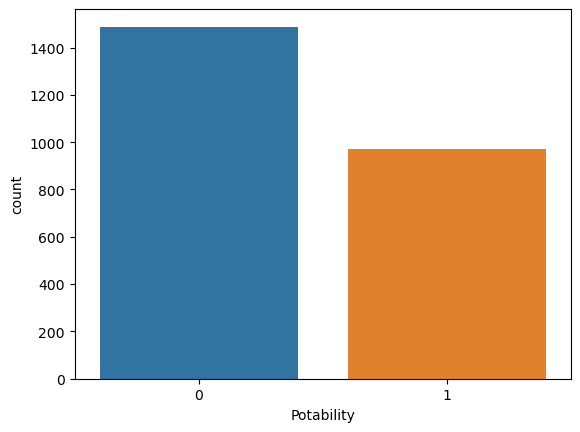

In [112]:
sns.countplot(data = train_df, x = 'Potability')
plt.show()

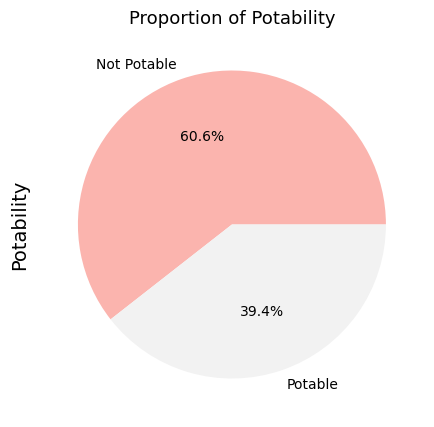

In [113]:
figure = plt.figure(figsize=[10, 5])

train_df['Potability'].value_counts().plot.pie(autopct='%3.1f%%',labels = ['Not Potable', 'Potable'] ,cmap = 'Pastel1')

plt.ylabel(ylabel='Potability', size=14)
plt.title(label='Proportion of Potability', size=13)
plt.show()

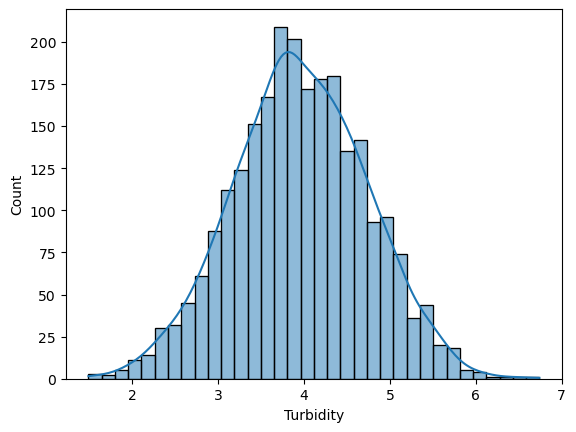

In [114]:
sns.histplot(train_df['Turbidity'], kde = True)
plt.show()

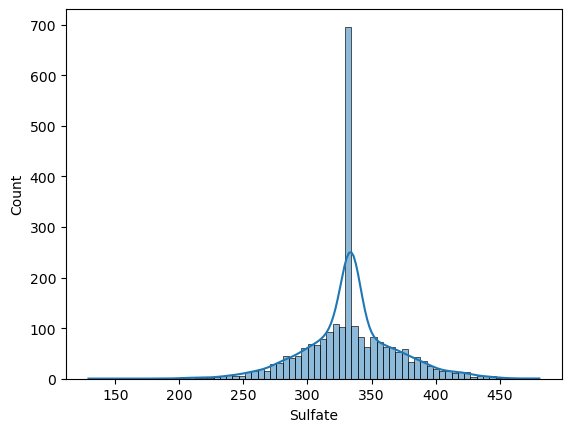

In [115]:
sns.histplot(train_df['Sulfate'], kde = True)
plt.show()

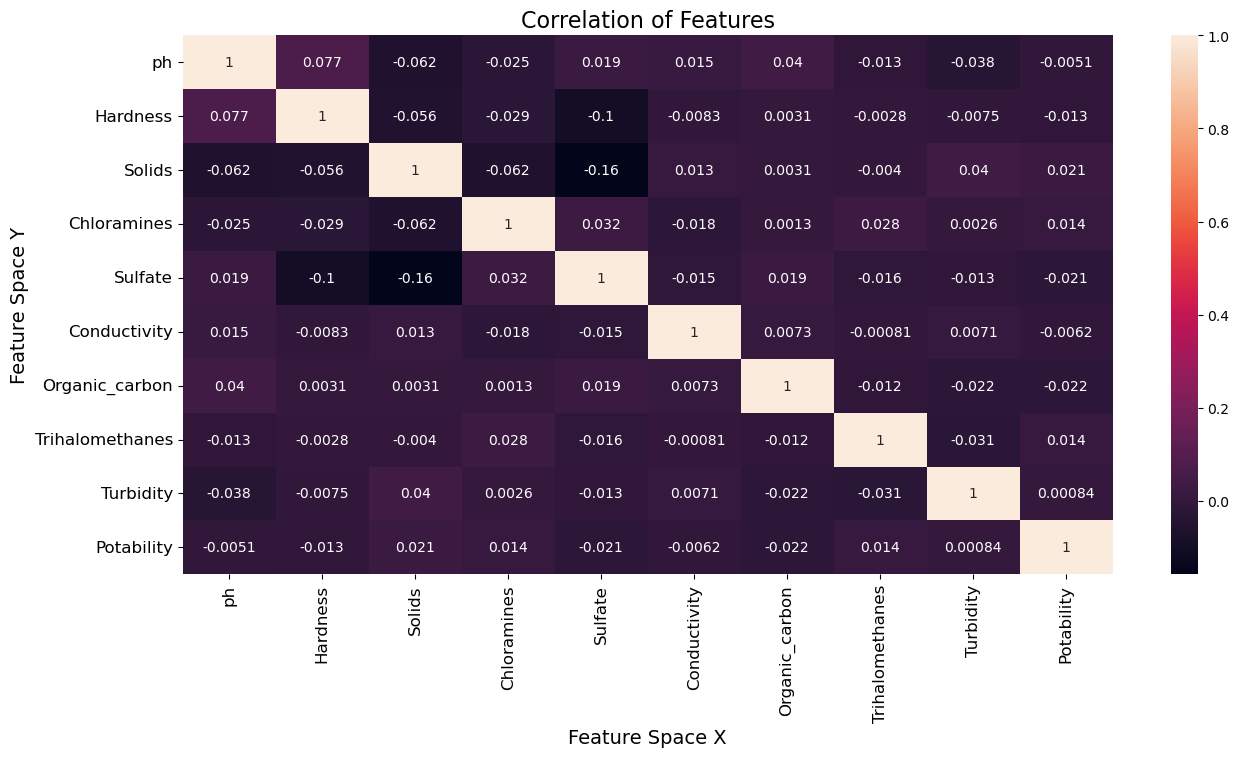

In [116]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

In [68]:
train_df.drop('ID', axis = 1, inplace = True)

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2457 non-null   float64
 1   Hardness         2457 non-null   float64
 2   Solids           2457 non-null   float64
 3   Chloramines      2457 non-null   float64
 4   Sulfate          2457 non-null   float64
 5   Conductivity     2457 non-null   float64
 6   Organic_carbon   2457 non-null   float64
 7   Trihalomethanes  2457 non-null   float64
 8   Turbidity        2457 non-null   float64
 9   Potability       2457 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 192.1 KB


# Train-Test Split:

In [70]:
x = train_df.iloc[:, 0:9]
y = train_df['Potability']

In [71]:
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.091132,202.569467,22256.950365,6.913501,304.951498,434.198436,13.696893,64.205667,4.478070
1,5.319769,204.202072,22390.795566,8.053559,315.027505,399.119025,13.974085,83.157997,2.925732
2,7.350379,193.633367,26736.085567,10.416589,309.416883,557.495685,16.519722,61.077383,3.663922
3,7.612517,225.492793,14812.970645,7.982595,356.690174,341.074925,14.994662,55.893916,2.939593
4,7.122637,183.402648,31295.902410,4.425026,333.900498,411.616070,14.066057,77.185792,3.750447
...,...,...,...,...,...,...,...,...,...
2452,4.187491,208.374188,21809.709834,5.846112,327.474203,264.508083,11.235144,46.682597,4.592959
2453,7.793915,164.958947,25506.912237,7.868036,358.259200,398.460312,15.297496,66.462192,4.220028
2454,6.630364,186.761088,30939.023214,7.703481,333.900498,330.876083,13.815757,86.753117,3.490588
2455,8.783168,218.032840,16183.586649,7.390474,334.053885,389.021616,16.354520,47.100982,4.274137


In [72]:
y

0       0
1       0
2       0
3       1
4       0
       ..
2452    1
2453    1
2454    0
2455    0
2456    1
Name: Potability, Length: 2457, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=101,shuffle=True)

# 1. DecisionTreeClassifier:

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtree = DecisionTreeClassifier()

In [76]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [77]:
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

# Model Evaluation:

In [78]:
def model_eval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [79]:
model_eval(y_train, y_pred_dt_train)

[[1171    0]
 [   0  794]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1171
           1       1.00      1.00      1.00       794

    accuracy                           1.00      1965
   macro avg       1.00      1.00      1.00      1965
weighted avg       1.00      1.00      1.00      1965



In [80]:
model_eval(y_test, y_pred_dt_test)

[[211 106]
 [102  73]]
The accuracy of the Model is : 0.5772357723577236
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       317
           1       0.41      0.42      0.41       175

    accuracy                           0.58       492
   macro avg       0.54      0.54      0.54       492
weighted avg       0.58      0.58      0.58       492



In [81]:
X_DT=dtree.predict([[5.735724, 158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])

In [82]:
X_DT

array([1], dtype=int64)

# 2. KNeighborsClassifier:

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
neigh = KNeighborsClassifier(n_neighbors = 5)

In [85]:
neigh.fit(x_train, y_train)

KNeighborsClassifier()

In [86]:
y_pred_kn_train = neigh.predict(x_train)
y_pred_kn_test = neigh.predict(x_test)

# Model Evaluation:

In [87]:
model_eval(y_train, y_pred_kn_train)

[[969 202]
 [376 418]]
The accuracy of the Model is : 0.705852417302799
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      1171
           1       0.67      0.53      0.59       794

    accuracy                           0.71      1965
   macro avg       0.70      0.68      0.68      1965
weighted avg       0.70      0.71      0.70      1965



In [88]:
model_eval(y_test, y_pred_kn_test)

[[210 107]
 [119  56]]
The accuracy of the Model is : 0.540650406504065
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       317
           1       0.34      0.32      0.33       175

    accuracy                           0.54       492
   macro avg       0.49      0.49      0.49       492
weighted avg       0.53      0.54      0.54       492



# GridSearchCV:

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [90]:
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2,4,6,8,10]

In [91]:
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,error_score=0)

In [92]:
grid_search_dt.fit(x_train, y_train)

GridSearchCV(error_score=0, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [93]:
y_pred_grid_train = grid_search_dt.predict(x_train)
y_pred_grid_test = grid_search_dt.predict(x_test)

# Model Evaluation:

In [94]:
model_eval(y_train, y_pred_grid_train)

[[1126   45]
 [ 112  682]]
The accuracy of the Model is : 0.9201017811704835
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1171
           1       0.94      0.86      0.90       794

    accuracy                           0.92      1965
   macro avg       0.92      0.91      0.92      1965
weighted avg       0.92      0.92      0.92      1965



In [95]:
model_eval(y_test, y_pred_grid_test)

[[209 108]
 [ 96  79]]
The accuracy of the Model is : 0.5853658536585366
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       317
           1       0.42      0.45      0.44       175

    accuracy                           0.59       492
   macro avg       0.55      0.56      0.55       492
weighted avg       0.59      0.59      0.59       492



In [101]:
y_pred_grid_test

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,

In [102]:
test_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,ID
0,NaN,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,2947
1,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,2782
2,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,1644
3,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,70
4,6.615350,179.240661,26392.863612,9.309160,NaN,496.363562,12.786595,78.262369,4.453443,2045


In [103]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               700 non-null    float64
 1   Hardness         819 non-null    float64
 2   Solids           819 non-null    float64
 3   Chloramines      819 non-null    float64
 4   Sulfate          639 non-null    float64
 5   Conductivity     819 non-null    float64
 6   Organic_carbon   819 non-null    float64
 7   Trihalomethanes  775 non-null    float64
 8   Turbidity        819 non-null    float64
 9   ID               819 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 64.1 KB


In [105]:
test_df.isna().sum()

ph                 119
Hardness             0
Solids               0
Chloramines          0
Sulfate            180
Conductivity         0
Organic_carbon       0
Trihalomethanes     44
Turbidity            0
ID                   0
dtype: int64

In [106]:
test_df.fillna(test_df.mean(), inplace = True)

In [107]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               819 non-null    float64
 1   Hardness         819 non-null    float64
 2   Solids           819 non-null    float64
 3   Chloramines      819 non-null    float64
 4   Sulfate          819 non-null    float64
 5   Conductivity     819 non-null    float64
 6   Organic_carbon   819 non-null    float64
 7   Trihalomethanes  819 non-null    float64
 8   Turbidity        819 non-null    float64
 9   ID               819 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 64.1 KB


In [108]:
test_water = test_df.iloc[:, 0:9]

In [110]:
predicted_test = grid_search_dt.predict(test_water)

In [111]:
predicted_test

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,

In [117]:
test_water['Potability'] = predicted_test

In [118]:
test_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.050005,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,1
1,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,1
2,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,0
3,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,1
4,6.615350,179.240661,26392.863612,9.309160,333.413519,496.363562,12.786595,78.262369,4.453443,0


In [121]:
test_water.to_csv('Submission_water.csv', index = False, header = False)